# Import Libraries

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import networkx as nx
import copy
import warnings
warnings.filterwarnings('ignore')

In [2]:
from load_models import *
from syngem_utils import *

In [3]:
torch.manual_seed(21)
np.random.seed(21)

# Load models

In [4]:
gem_model_50_21 = load_gemini_fc_50_sparsity_seed_21()
gem_model_50_42 = load_gemini_fc_50_sparsity_seed_42()
gem_model_50_63 = load_gemini_fc_50_sparsity_seed_63()

=> Reading YAML config from Configs/hypercube/resnet20/resnet20_quantized_iter_hc_target_sparsity_1_4_highreg.yml
=> Reading YAML config from Configs/synflow_fc.yml


In [5]:
syn_model_50_21 = load_synflow_fc_sparsity_50_seed_21()
syn_model_50_42 = load_synflow_fc_sparsity_50_seed_42()
syn_model_50_63 = load_synflow_fc_sparsity_50_seed_63()

In [6]:
rnd_model_50_21 = load_random_fc_sparsity_50_seed_21()
rnd_model_50_42 = load_random_fc_sparsity_50_seed_42()
rnd_model_50_63 = load_random_fc_sparsity_50_seed_63()

# Structural Analysis

### Get sparsities

In [7]:
sprse_gem_50_21 = check_sparsity(gem_model_50_21, single = True)
sprse_gem_50_42 = check_sparsity(gem_model_50_42, single = True)
sprse_gem_50_63 = check_sparsity(gem_model_50_63, single = True)

In [8]:
sprse_syn_50_21 = check_sparsity(syn_model_50_21, single = True)
sprse_syn_50_42 = check_sparsity(syn_model_50_42, single = True)
sprse_syn_50_63 = check_sparsity(syn_model_50_63, single = True)

In [9]:
sprse_rnd_50_21 = check_sparsity(rnd_model_50_21, single = True)
sprse_rnd_50_42 = check_sparsity(rnd_model_50_42, single = True)
sprse_rnd_50_63 = check_sparsity(rnd_model_50_63, single = True)

### Sparsity tables

In [10]:
table = make_table(sprse_gem_50_21, sprse_gem_50_42, sprse_gem_50_63)
table

,seed 21,seed 42,seed 63
layer_1,49.116,48.798,48.682
layer_2,49.840,50.200,49.630
layer_3,49.620,49.560,49.750
layer_4,50.530,49.740,50.530
layer_5,51.030,50.120,50.440
layer_6,58.800,57.300,57.900
overall_sparsity,49.579,49.240,49.230


In [11]:
table = make_table(sprse_syn_50_21, sprse_syn_50_42, sprse_syn_50_63)
table

,seed 21,seed 42,seed 63
layer_1,31.662,31.448,31.619
layer_2,85.030,85.760,85.120
layer_3,85.640,85.750,85.090
layer_4,84.980,85.340,85.430
layer_5,84.730,85.100,85.080
layer_6,98.100,99.200,98.100
overall_sparsity,50.119,50.119,50.119


In [12]:
table = make_table(sprse_rnd_50_21, sprse_rnd_50_42, sprse_rnd_50_63)
table

,seed 21,seed 42,seed 63
layer_1,50.054,50.129,50.175
layer_2,51.030,49.990,49.870
layer_3,50.470,50.210,49.620
layer_4,50.140,49.830,50.030
layer_5,49.370,50.640,50.740
layer_6,49.900,47.400,47.900
overall_sparsity,50.119,50.119,50.119


### Plot sparsities

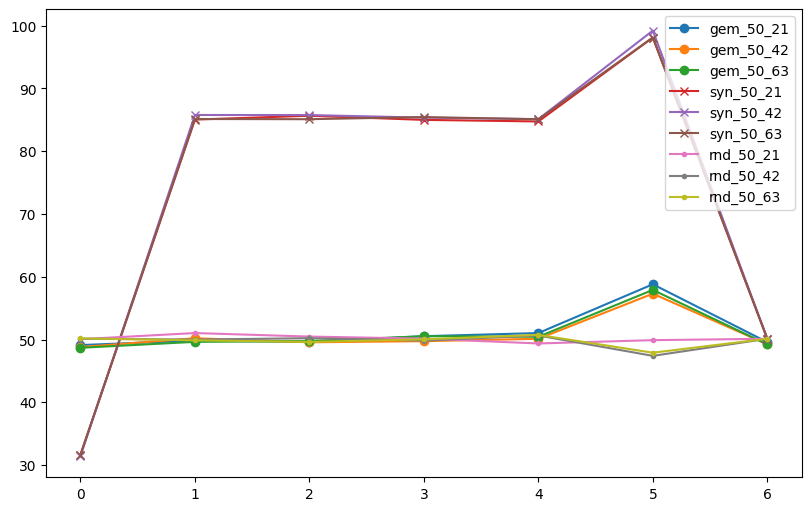

In [13]:
fig, ax = plt.subplots(figsize=(8, 5), layout='constrained')

ax.plot(list(sprse_gem_50_21.values()), label='gem_50_21', marker='o')
ax.plot(list(sprse_gem_50_42.values()), label='gem_50_42', marker='o')
ax.plot(list(sprse_gem_50_63.values()), label='gem_50_63', marker='o')

ax.plot(list(sprse_syn_50_21.values()), label='syn_50_21', marker='x')
ax.plot(list(sprse_syn_50_42.values()), label='syn_50_42', marker='x')
ax.plot(list(sprse_syn_50_63.values()), label='syn_50_63', marker='x')

ax.plot(list(sprse_rnd_50_21.values()), label='rnd_50_21', marker='.')
ax.plot(list(sprse_rnd_50_42.values()), label='rnd_50_42', marker='.')
ax.plot(list(sprse_rnd_50_63.values()), label='rnd_50_63', marker='.')

ax.legend()
plt.show()

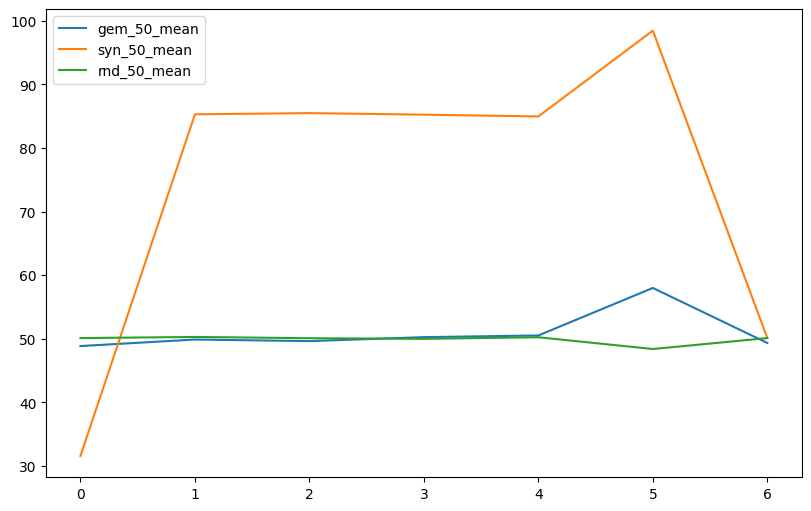

In [14]:
fig, ax = plt.subplots(figsize=(8, 5), layout='constrained')

gem_mean = (np.array(list(sprse_gem_50_21.values())) + 
            np.array(list(sprse_gem_50_42.values())) +
            np.array(list(sprse_gem_50_63.values()))) / 3
ax.plot(gem_mean, label='gem_50_mean')

syn_mean = ( np.array(list(sprse_syn_50_21.values())) + np.array(list(sprse_syn_50_42.values())) + np.array(list(sprse_syn_50_63.values()))) / 3
ax.plot(syn_mean, label='syn_50_mean')

rnd_mean = ( np.array(list(sprse_rnd_50_21.values())) + np.array(list(sprse_rnd_50_42.values())) + np.array(list(sprse_rnd_50_63.values()))) / 3
ax.plot(rnd_mean, label='rnd_50_mean')

ax.legend()
plt.show()

### get units

In [15]:
gem_fil_50_21 = get_filters(gem_model_50_21)
gem_fil_50_42 = get_filters(gem_model_50_42)
gem_fil_50_63 = get_filters(gem_model_50_63)

In [16]:
syn_fil_50_21 = get_filters(syn_model_50_21)
syn_fil_50_42 = get_filters(syn_model_50_42)
syn_fil_50_63 = get_filters(syn_model_50_63)

In [17]:
rnd_fil_50_21 = get_filters(rnd_model_50_21)
rnd_fil_50_42 = get_filters(rnd_model_50_42)
rnd_fil_50_63 = get_filters(rnd_model_50_63)

### define distance measures

In [18]:
def editDistanceSigns(a,b):
    nums = len(a) - len(np.intersect1d(np.where(b==0), np.where(a==0)))
    same = len(np.intersect1d(np.where(a<0), np.where(b<0))) + len(np.intersect1d(np.where(a>0), np.where(b>0)))
    if nums == 0:
        return 0
    return (nums-same)/nums

In [19]:
# MAED 
def mean_absolute_error_distance(a,b):
    
    a_flat_sort = np.sort(a.flatten())
    b_flat_sort = np.flip(np.sort(b.flatten()))
    
    worst_alignment = sum(abs(a_flat_sort - b_flat_sort))

    dist = sum(abs(a - b).flatten()) / worst_alignment
    
    
    return dist

In [24]:
test = order_by_dist(gem_fil_50_21, gem_fil_50_42, editDistanceSigns, fc=True)

### get all distances for unordered 

In [25]:
fil_1 = gem_fil_50_21
fil_2 = gem_fil_50_42

all_dist_matrices_un = []

for x in range(len(fil_1)):
    new_mat = np.zeros((len(fil_1[x]), len(fil_2[x])), dtype=float)
    
    for i in range(len(fil_1[x])):
        for j in range(len(fil_2[x])):
            dist = 0

            dist = mean_absolute_error_distance(fil_1[x][i].flatten(),fil_2[x][j].flatten())

            new_mat[i][j] = dist
            
    all_dist_matrices_un.append(new_mat)

### get all distances for ordered 

In [26]:
fil_1 = gem_fil_50_21
fil_2 = test

all_dist_matrices_or = []

for x in range(len(fil_1)):
    new_mat = np.zeros((len(fil_1[x]), len(fil_2[x])), dtype=float)
    
    for i in range(len(fil_1[x])):
        for j in range(len(fil_2[x])):
            dist = 0

            dist = mean_absolute_error_distance(fil_1[x][i].flatten(),fil_2[x][j].flatten())

            new_mat[i][j] = dist
            
    all_dist_matrices_or.append(new_mat)

### plot all distances

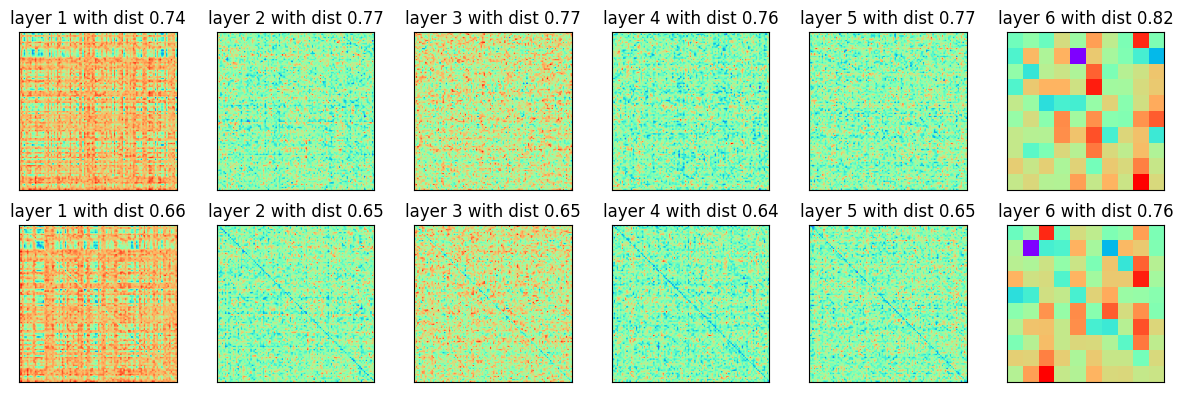

In [27]:
fig, axs = plt.subplots(nrows=2, ncols=6, figsize=(12,4))

counter = 0

all_dists = all_dist_matrices_un + all_dist_matrices_or

for ax in axs.flat:
    
    img = all_dists[counter]
    ax.imshow(img, cmap = "rainbow")
    diag_mean = sum(all_dists[counter].diagonal()) / (len(all_dists[counter].diagonal()))
    ax.set_title(f"layer {counter + 1 if counter < 6 else counter - 6 + 1} with dist {np.round(diag_mean, 2)}")
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
        
    counter += 1


plt.tight_layout()
plt.show()

# after showing that it works now do for all interesting combinations
# maybe based on smallest dist to other methods 

In [78]:
all_model_names =  ["gem_model_50_21", "gem_model_50_42", "gem_model_50_63",
                    "syn_model_50_21", "syn_model_50_42", "syn_model_50_63",
                    "rnd_model_50_21", "rnd_model_50_42", "rnd_model_50_63"]

all_models = [gem_fil_50_21, gem_fil_50_42, gem_fil_50_63,
              syn_fil_50_21, syn_fil_50_42, syn_fil_50_63,
              rnd_fil_50_21, rnd_fil_50_42, rnd_fil_50_63]

all_dist_matrices = []

for i in range(len(all_models)):
    for j in range(len(all_models)):
        
        if len(all_dist_matrices) == 0:
            print("first")
            ordered_model = order_by_dist(all_models[i], all_models[j], mean_absolute_error_distance, fc = True)

            dist_matrix = []

            dist = mean_absolute_error_distance(all_models[i][x].flatten(),ordered_model[x].flatten())

            all_dist_matrices.append([all_model_names[i] + all_model_names[j] , dist])
            all_dist_matrices.append([all_model_names[j] + all_model_names[i] , dist])
        
        
        
        elif i != j:
            for name in all_dist_matrices:
                combi = all_model_names[i] + all_model_names[j]
                if combi not in name:
                    print(i,j)
                    ordered_model = order_by_dist(all_models[i], all_models[j], mean_absolute_error_distance, fc = True)

                    dist_matrix = []

                    dist = mean_absolute_error_distance(all_models[i][x].flatten(),ordered_model[x].flatten())

                    all_dist_matrices.append([all_model_names[i] + all_model_names[j] , dist])
                    all_dist_matrices.append([all_model_names[j] + all_model_names[i] , dist])
 
    

first
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1


KeyboardInterrupt: 

In [70]:
all_dist_matrices

[['gem_model_50_21gem_model_50_21', 0.0],
 ['gem_model_50_21gem_model_50_42', 0.756215825917301]]

In [67]:
'gem_model_50_21gem_model_50_21' in all_dist_matrices

False

In [80]:
for i in all_dist_matrices:
    if 'gem_model_50_21gem_model_50_41' not in i:
        print("ay")

ay
ay
ay
ay
ay
ay
ay
ay
ay
ay
ay
ay
ay
ay
ay
ay


In [45]:
'gem_model_50_21gem_model_50_42' in all_dist_matrices

True

In [ ]:
all_model_names =  ["gem_model_50_21", "gem_model_50_42", "gem_model_50_63",
                    "syn_model_50_21", "syn_model_50_42", "syn_model_50_63",
                    "rnd_model_50_21", "rnd_model_50_42", "rnd_model_50_63"]

all_models = [gem_fil_50_21, gem_fil_50_42, gem_fil_50_63,
              syn_fil_50_21, syn_fil_50_42, syn_fil_50_63,
              rnd_fil_50_21, rnd_fil_50_42, rnd_fil_50_63]

all_dist_matrices_lo = []

for i in range(len(all_models)):
    for j in range(len(all_models)):
        
        #ordered_model = order_by_dist(all_models[i], all_models[j], mean_absolute_error_distance)
        
        dist_matrix = []

        dist = mean_absolute_error_distance(all_models[i][x].flatten(),all_models[j][x].flatten())

        #dist_matrix.append(dist)
              
        all_dist_matrices_lo.append([all_model_names[i] + all_model_names[j] , dist])
 
    

In [ ]:
all_dist_matrices_lo

In [ ]:
peter = all_dist_matrices

In [ ]:
tret = np.zeros((81))

for i in range(len(peter)):
        tret[i] = np.mean(peter[i][1])
    

In [ ]:
lpk = np.reshape(tret, (9,9))

In [ ]:
lpk

In [ ]:
ys  =  ["gem_21", "gem_42", "gem_63",
        "syn_21", "syn_42", "syn_63",
        "rnd_21", "rnd_42", "rnd_63"]

In [ ]:
fig, ax = plt.subplots()
img = ax.imshow(lpk, cmap = "rainbow")

ax.set_yticks(np.arange(0,9,1))
ax.tick_params(axis="y")#, rotation=45)
ax.set_yticklabels(ys)

ax.set_xticks(np.arange(0,9,1))
ax.tick_params(axis="x", rotation=90)
ax.set_xticklabels(ys)
fig.colorbar(img)
fig.show()

In [ ]:
lpk_copy = lpk.copy()
for i in range(len(lpk_copy.diagonal())):
    lpk_copy[i][i] = 100
    

In [ ]:
gg = np.where(lpk_copy == lpk_copy.min(axis=1))
#for u in gg:
#    print(u)
#print(all_model_names[gg[0][0]], all_model_names[gg[0][1]])
print(gg)

In [ ]:
find_min = lpk_copy.min(axis=1)
print(find_min)
find_min_index = list(lpk_copy.flatten()).index(find_min[:])
print(find_min_index)

In [ ]:
for i in find_min:
    print(list(lpk_copy.flatten()).index(i))

In [ ]:
all_model_names =  ["gem_model_50_21", "gem_model_50_42", "gem_model_50_63",
                    "syn_model_50_21", "syn_model_50_42", "syn_model_50_63",
                    "rnd_model_50_21", "rnd_model_50_42", "rnd_model_50_63"]

all_models = [gem_fil_50_21, gem_fil_50_42, gem_fil_50_63,
              syn_fil_50_21, syn_fil_50_42, syn_fil_50_63,
              rnd_fil_50_21, rnd_fil_50_42, rnd_fil_50_63]

all_dist_matrices_too = []

for i in range(len(all_models)):
    for j in range(len(all_models)):
        
        ordered_model = order_by_dist(all_models[i], all_models[j], editDistanceSigns)
        
        dist_matrix = []

        for x in range(len(all_models[i])):
            new_mat = np.zeros((len(all_models[i][x]), len(all_models[j][x])), dtype=float)

            for l in range(len(all_models[i][x])):
                for m in range(len(all_models[j][x])):
                    dist = 0

                    dist = editDistanceSigns(all_models[i][x][l].flatten(),all_models[j][x][m].flatten())

                    new_mat[l][m] = dist
            diag_mean = sum(new_mat.diagonal()) / (len(new_mat.diagonal()))
            dist_matrix.append(diag_mean)
            
            
        all_dist_matrices_too.append([all_model_names[i] + all_model_names[j] , dist_matrix])
 
    

In [ ]:
plo = all_dist_matrices_too.copy()
trut = np.zeros((81))

for i in range(len(plo)):
        trut[i] = np.mean(plo[i][1])
trut = np.reshape(trut, (9,9))

In [ ]:
fig, ax = plt.subplots()
img = ax.imshow(trut, cmap = "rainbow")

ax.set_yticks(np.arange(0,9,1))
ax.tick_params(axis="y")#, rotation=45)
ax.set_yticklabels(ys)

ax.set_xticks(np.arange(0,9,1))
ax.tick_params(axis="x", rotation=90)
ax.set_xticklabels(ys)
fig.colorbar(img)
fig.show()

In [ ]:
trut_copy = trut.copy()
for i in range(len(trut_copy.diagonal())):
    trut_copy[i][i] = 100
np.min(trut_copy)

In [ ]:
gg = np.where(trut_copy == trut_copy.min())
print(all_model_names[gg[0][0]], all_model_names[gg[0][1]])

In [ ]:
def getNormalizedEditDistance(a, b):

    # for two hidden neuron trees, return 1 if they are completely different, 0 if they are exactly the same
    if (len(a) == 0 and len(b) == 0):
        return 0
    intersect, inda, indb = np.intersect1d(a, b, return_indices=True)
    if (intersect.shape[0] > 0):
        edit = np.delete(a, inda).shape[0] + np.delete(b, indb).shape[0]
        normalizedEdit = edit / np.unique(np.concatenate((a, b), axis=0)).shape[0]
    else:
        normalizedEdit = 1
    return normalizedEdit

In [ ]:
all_model_names =  ["gem_model_50_21", "gem_model_50_42", "gem_model_50_63",
                    "syn_model_50_21", "syn_model_50_42", "syn_model_50_63",
                    "rnd_model_50_21", "rnd_model_50_42", "rnd_model_50_63"]

all_models = [gem_fil_50_21, gem_fil_50_42, gem_fil_50_63,
              syn_fil_50_21, syn_fil_50_42, syn_fil_50_63,
              rnd_fil_50_21, rnd_fil_50_42, rnd_fil_50_63]

all_dist_matrices_three = []

for i in range(len(all_models)):
    for j in range(len(all_models)):
        
        ordered_model = order_by_dist(all_models[i], all_models[j], getNormalizedEditDistance)
        
        dist_matrix = []

        for x in range(len(all_models[i])):
            new_mat = np.zeros((len(all_models[i][x]), len(all_models[j][x])), dtype=float)

            for l in range(len(all_models[i][x])):
                for m in range(len(all_models[j][x])):
                    dist = 0

                    dist = getNormalizedEditDistance(np.nonzero(all_models[i][x][l].flatten())[0],np.nonzero(all_models[j][x][m].flatten())[0])

                    new_mat[l][m] = dist
            diag_mean = sum(new_mat.diagonal()) / (len(new_mat.diagonal()))
            dist_matrix.append(diag_mean)
            
            
        all_dist_matrices_three.append([all_model_names[i] + all_model_names[j] , dist_matrix])
 
   

In [ ]:
np.nonzero(all_models[0][0].flatten())[0]

In [ ]:
len(all_models[0][0].flatten())

In [ ]:
klo = all_dist_matrices_three.copy()
trot = np.zeros((81))

for i in range(len(klo)):
        trot[i] = np.mean(klo[i][1])
trot = np.reshape(trot, (9,9))

In [ ]:
fig, ax = plt.subplots()
img = ax.imshow(trot, cmap = "rainbow")

ax.set_yticks(np.arange(0,9,1))
ax.tick_params(axis="y")#, rotation=45)
ax.set_yticklabels(ys)

ax.set_xticks(np.arange(0,9,1))
ax.tick_params(axis="x", rotation=90)
ax.set_xticklabels(ys)
fig.colorbar(img)
fig.show()

In [ ]:
trot_copy = trot.copy()
for i in range(len(trot_copy.diagonal())):
    trot_copy[i][i] = 100
np.min(trot_copy)

In [ ]:
gg = np.where(trut_copy == trut_copy.min())
print(all_model_names[gg[0][0]], all_model_names[gg[0][1]])